NOTE: This notebook uses a JSON dictionary created by the `ndlar_flow/scripts/low_level_data_ana/charge_data_feature_studies/Whole_Tile_Trigger_Event_Dictionary_Builder.py` script. As this notebook comprises of preliminary/diagnostic studies, the code may not be fully optimized. The code will be optimized in terms of runtime and organization as time permits. Please contact Elise Hinkle (ehinkle@uchicago.edu) with any questions, comments, or concerns. Also, all JSON dictionary file locations are likely outdated and should be changed based on where the user has chosen to store the relevant dictionary(ies).

In [1]:
# Import relevant packages/libraries
import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np
import h5py
import argparse
from datetime import datetime
import glob
import json
import cmasher as cmr
import math
import matplotlib as mpl
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.gridspec import GridSpec
import sys
import os
import sys
sys.path.append('/global/cfs/cdirs/dune/users/ehinkle/nd_prototypes_ana/2x2_sim/run-ndlar-flow/ndlar_flow/event_display/LAr_evd/')
from lar2x2_evd import *
from collections import Counter

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Hello


In [2]:
# Open dictionary with WTT events
events_data_file = '/global/cfs/cdirs/dune/users/ehinkle/nd_prototypes_ana/2x2_sim/run-ndlar-flow/ndlar_flow/event_display/LAr_evd/full_tile_trigger_dict_V5_beam_only_test.json'
events_data_open = open(events_data_file)
events_data_dict = json.load(events_data_open)

# Only look at events with true WTT events
beam_full_tile_spike_dict = {k: v for k, v in events_data_dict.items() if any(v['event_full_tile_spike']) and v['is_beam']}
print('Number of beam events with full tile spike: ', len(beam_full_tile_spike_dict))
#print('Number of non-beam events with full tile spike: ', len(non_beam_full_tile_spike_dict))

Number of beam events with full tile spike:  143


[array([4]), array([4]), array([3]), array([4, 4]), array([3, 4, 4]), array([1]), array([7]), array([2, 4]), array([4]), array([3]), array([3]), array([4]), array([3]), array([8]), array([2, 4]), array([4, 4]), array([3]), array([4]), array([7, 7]), array([3]), array([3]), array([4]), array([4]), array([3]), array([7]), array([7]), array([4, 4]), array([4, 4]), array([4, 4]), array([8]), array([1, 3]), array([7]), array([1, 1, 3, 3]), array([7]), array([2, 4]), array([3]), array([3]), array([4, 4]), array([2, 2]), array([3, 3]), array([2, 4]), array([2]), array([7]), array([3]), array([2, 3, 3, 4, 4]), array([4]), array([1]), array([3]), array([4, 4]), array([2, 4]), array([1]), array([1]), array([2, 4, 4]), array([4]), array([2]), array([4]), array([4, 4]), array([3, 3]), array([3, 3]), array([4]), array([8, 8]), array([3, 3]), array([4, 4]), array([4]), array([4, 4]), array([3]), array([3]), array([1]), array([3]), array([3]), array([3, 3]), array([4]), array([4]), array([4]), array(

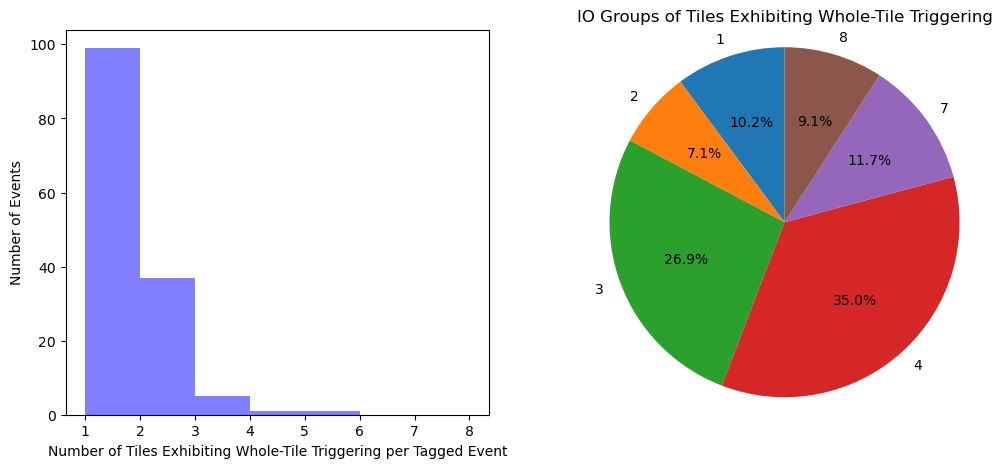

In [46]:
# Characterize events with WTT by tracking the number of tiles featuring WTT and the IO groups of tiles with WTT
# Also, track the charge and energy recorded in the TPCs of tiles with WTT
# Also, make plots of number of tiles with WTT per event and IO groups of tiles with WTT (latter is pie chart)


num_wtt_per_event = []
iog_per_event = []
iog_negative_energy_per_event = []
iog_negative_charge_per_event = []
iog_positive_energy_per_event = []
iog_positive_charge_per_event = []

true_wtt_mask = [beam_full_tile_spike_dict[k]['event_full_tile_spike'] for k in beam_full_tile_spike_dict.keys()]
for k in beam_full_tile_spike_dict.keys():
    true_wtt_mask = beam_full_tile_spike_dict[k]['event_full_tile_spike']
    #print(true_wtt_mask)
    num_wtt_per_event.append(sum(beam_full_tile_spike_dict[k]['event_full_tile_spike']))
    #print(beam_full_tile_spike_dict[k]['io_group'])
    wtt_iog = np.array([beam_full_tile_spike_dict[k]['io_group'][i] for i in range(len(beam_full_tile_spike_dict[k]['io_group'])) if true_wtt_mask[i] == True])
    #print(wtt_iog)
    n_energy = np.array([beam_full_tile_spike_dict[k]['iog_negative_energy'][i] for i in range(len(beam_full_tile_spike_dict[k]['iog_negative_energy'])) if true_wtt_mask[i] == True])
    p_energy = np.array([beam_full_tile_spike_dict[k]['iog_positive_energy'][i] for i in range(len(beam_full_tile_spike_dict[k]['iog_positive_energy'])) if true_wtt_mask[i] == True])
    n_charge = np.array([beam_full_tile_spike_dict[k]['iog_negative_charge'][i] for i in range(len(beam_full_tile_spike_dict[k]['iog_negative_charge'])) if true_wtt_mask[i] == True])
    p_charge = np.array([beam_full_tile_spike_dict[k]['iog_positive_charge'][i] for i in range(len(beam_full_tile_spike_dict[k]['iog_positive_charge'])) if true_wtt_mask[i] == True])
    iog_negative_energy_per_event.append(n_energy)
    iog_positive_energy_per_event.append(p_energy)
    iog_negative_charge_per_event.append(n_charge)
    iog_positive_charge_per_event.append(p_charge)
    iog_per_event.append(wtt_iog)
    if 5 in wtt_iog or 6 in wtt_iog:
        print('Event with WTT in IOG 5 or 6: ', k)
        print(beam_full_tile_spike_dict[k]['io_group'])
        print(wtt_iog)
print(iog_per_event)

fig, axs = plt.subplots(1,2, figsize=(12, 5))
axs[0].hist(num_wtt_per_event, bins=range(1, 9), histtype='stepfilled', color='b', alpha=0.5)
axs[0].set_xlabel('Number of Tiles Exhibiting Whole-Tile Triggering per Tagged Event')
axs[0].set_ylabel('Number of Events')

all_iog = [iog for sublist in iog_per_event for iog in sublist]
labels, sizes = np.unique(all_iog, return_counts=True)
axs[1].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
axs[1].axis('equal')
axs[1].set_title('IO Groups of Tiles Exhibiting Whole-Tile Triggering')
print(len(all_iog))

Text(0.5, 0.98, 'Energy on IO Groups of Tiles Exhibiting Whole-Tile Triggering')

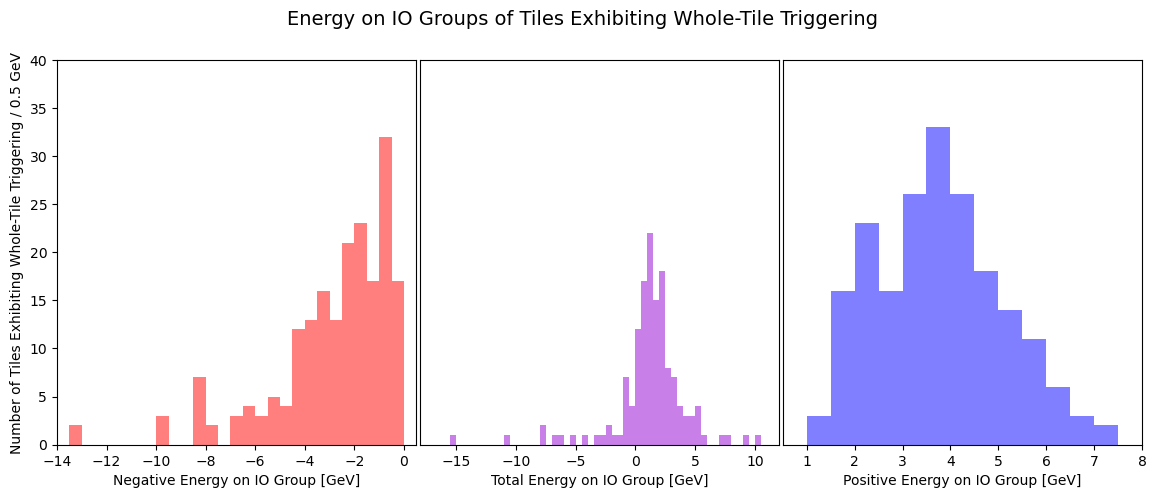

In [93]:
# Plot WTT event energy deposition in IO group associated with WTT tile (look at negative and positive energy separately and together (total energy))

fig, axs = plt.subplots(1,3, figsize=(14, 5))
iog_positive_energy_all = [e for sublist in iog_positive_energy_per_event for e in sublist]
iog_negative_energy_all = [e for sublist in iog_negative_energy_per_event for e in sublist]
iog_positive_charge_all = [e for sublist in iog_positive_charge_per_event for e in sublist]
iog_negative_charge_all = [e for sublist in iog_negative_charge_per_event for e in sublist]

iog_total_energy = [sum(iog_negative_energy_per_event[i]) + sum(iog_positive_energy_per_event[i]) for i in range(len(iog_negative_energy_per_event))]
iog_total_charge = [sum(iog_negative_charge_per_event[i]) + sum(iog_positive_charge_per_event[i]) for i in range(len(iog_negative_charge_per_event))]
axs[1].hist(np.array(iog_total_energy)/1000, bins=np.linspace(-18,12,61), histtype='stepfilled', color='darkviolet', alpha=0.5)
axs[1].set_xlabel('Total Energy on IO Group [GeV]')
#axs[1].sharey(axs[0])
#axs[1].set_ylabel('Number of Tiles Exhibiting Whole-Tile Triggering')
axs[1].set_yticks([])
axs[1].set_yticklabels([])
axs[1].set_ylim(0, 40)
axs[1].set_xlim(-18, 12)

axs[2].hist(np.array(iog_positive_energy_all)/1000, bins=np.linspace(0,8,17),histtype='stepfilled', color='b', alpha=0.5)
axs[2].set_xlabel('Positive Energy on IO Group [GeV]')
#axs[2].set_ylabel('Number of Tiles Exhibiting Whole-Tile Triggering')
axs[2].set_yticks([])
axs[2].set_yticklabels([])
axs[2].set_ylim(0, 40)
axs[2].set_xlim(0.5, 8)

axs[0].hist(np.array(iog_negative_energy_all)/1000,bins=np.linspace(-14,0,29), histtype='stepfilled', color='r', alpha=0.5)
axs[0].set_xlabel('Negative Energy on IO Group [GeV]')
axs[0].set_ylabel('Number of Tiles Exhibiting Whole-Tile Triggering / 0.5 GeV')
axs[0].set_ylim(0, 40)
axs[0].set_xlim(-14, 0.5)
plt.subplots_adjust(wspace=0.01)
#axs[0].set_yticklabels([])
fig.suptitle('Energy on IO Groups of Tiles Exhibiting Whole-Tile Triggering', fontsize=14)


(array([[ 0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  3.,  2.,  0.],
        [ 0.,  0.,  0.,  0.,  2.,  2.,  0.,  2.],
        [ 0.,  0.,  0.,  5.,  4.,  2.,  2.,  0.],
        [ 0.,  1.,  2., 12., 13.,  2.,  2.,  3.],
        [ 0.,  9., 12., 16.,  8.,  8.,  4.,  0.],
        [15., 22., 18., 12.,  3.,  3.,  1.,  2.]]),
 array([-13.1278295 , -11.49548855,  -9.8631476 ,  -8.23080665,
         -6.5984657 ,  -4.96612475,  -3.3337838 ,  -1.70144285,
         -0.0691019 ]),
 array([1.1626604 , 1.90289685, 2.6431333 , 3.38336975, 4.1236062 ,
        4.86384265, 5.6040791 , 6.34431555, 7.084552  ]),
 <matplotlib.collections.QuadMesh at 0x7fbd10fc3ad0>)

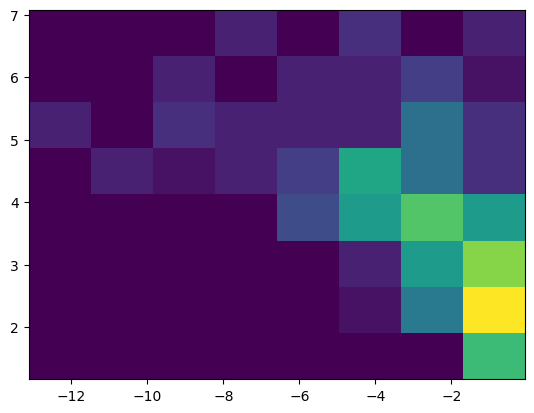

In [79]:
# Quick check as to whether there is an obvious correlation between positive and negative energy on IO groups with WTT
plt.hist2d((np.array(iog_negative_energy_all)/1000), (np.array(iog_positive_energy_all)/1000), bins=8, cmap='viridis')